Detection of Mines/Rock using SONAR Data. Accuracy has been compared among various classification models

This project aims to classify the obstacle under sea water as either Rock OR Mines.

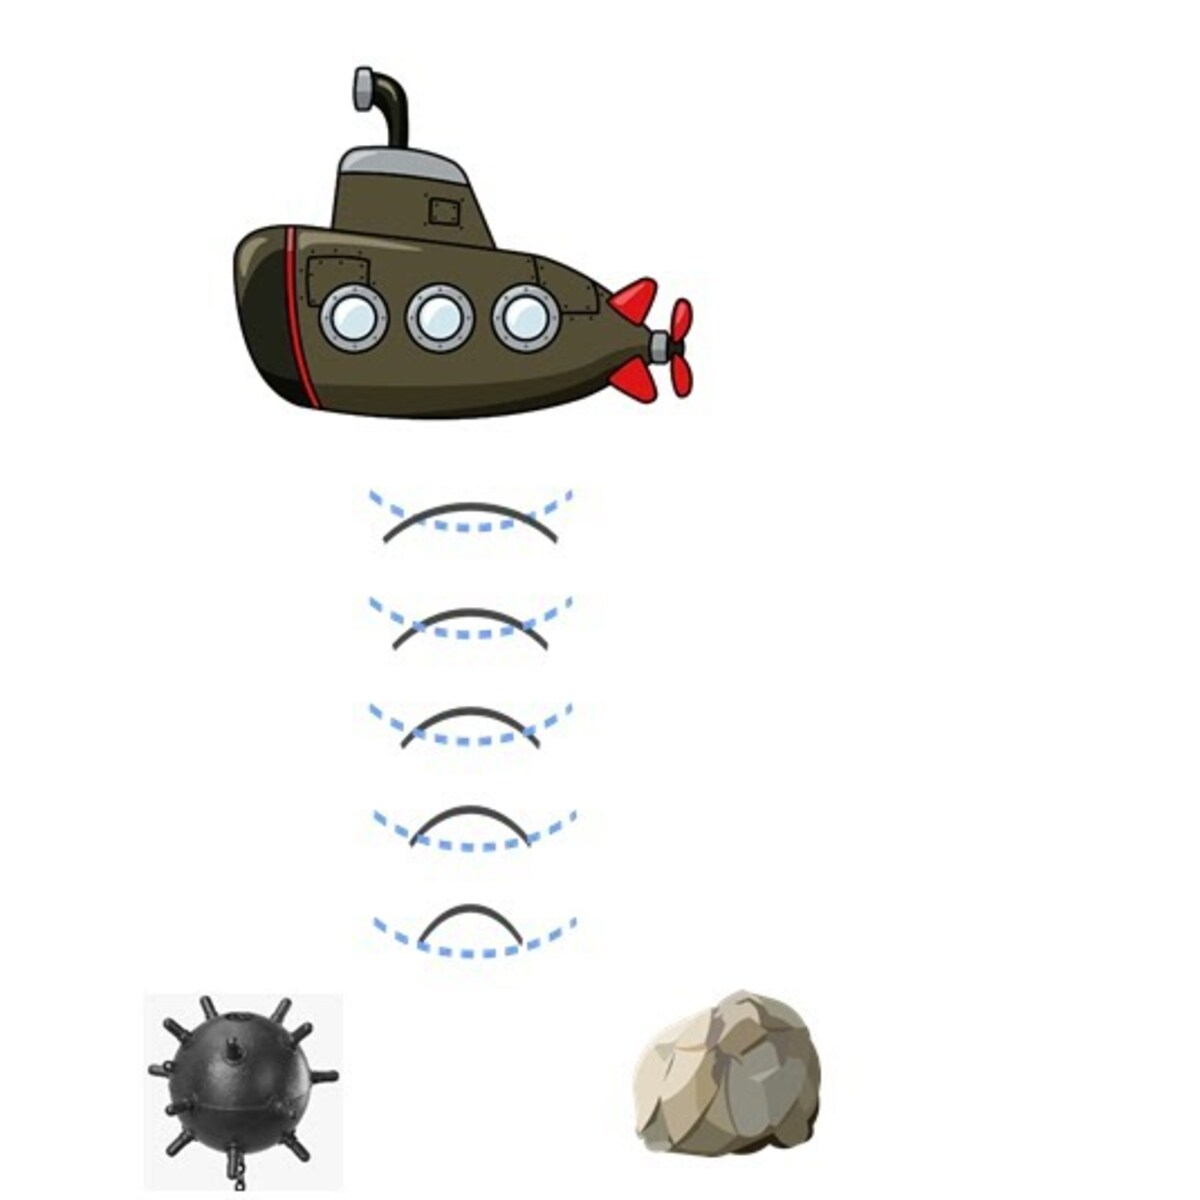

During the Russo-Japanese War of 1904–1905, two mines blew up when the Petropavlovsk struck them near Port Arthur, sending the holed vessel to the bottom and killing most of his crew in the process. This show us that why detecting mines under sea water, with good accuracy, is crucial to Navy of any country.

About Dataset
Context

Dataset is collection of sonar data. Which Predict weather we have found rock or mine



Content
It contains various data column which consist sonar data. Last column tells us weather it has found rock or mine.
Target Column consist of :

> R - > Rock

> M -> Mine



# Import Required Library

In [1]:
! pip install keras

In [2]:
import numpy as np
import pandas as pd
import keras

# Read Dataset

In [3]:
data=pd.read_csv("sonar.csv", header= None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [6]:
X=data.iloc[: , 0:60].values

In [7]:
y=data.iloc[:,60].values

In [8]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [9]:
# Feature Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Split the data in training and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.25)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform( X_train)
X_test = sc.fit_transform ( X_test)

# Build ANN Model

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
# Initialize the model
model = Sequential()
# Build the input layer and hidden layer with dropout
model.add(Dense(units=30, activation='relu', input_dim= 60))
model.add(Dropout(rate=0.1))
# Adding  a Second Hidden Layer
model.add(Dense(units=15, activation='relu'))
# Adding an Output Layer
model.add(Dense( units=1, activation ='sigmoid'))

In [15]:
# Compiling the ANN
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1830      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 2,311
Trainable params: 2,311
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fitting the ANN model
model.fit( X_train , y_train, batch_size=10, epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.6026
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.6410
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7115
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7949
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8077
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8462
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8269
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8654
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8590
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8974
Epoch 11/50
16/16 [

In [18]:
y_pred= model.predict(X_test)>0.5

2/2 [==============================] - 0s 2ms/step


In [19]:
y_pred

array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False]])

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [21]:
cm

array([[23,  6],
       [ 1, 22]], dtype=int64)

In [22]:
24+21

45

In [23]:
24+21+2+5

52

In [24]:
#accuracy
45/52

0.8653846153846154